# DS 3000 - Assignment 06

**Student Name**: Matthew Tong

**Date**: 2/15/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(0pts) Load the attached data into a pandas dataframe: diamonds.csv

This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.com

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns

diamonds_df = pd.read_csv("diamonds.csv")

## Question 2: 
(5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc.

Note: you can use the .describe() method from the dataframe to obtain the descriptive statistics, or any suitable approach.

In [365]:
diamonds_df["carat"].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

count: there are 53,940 diamonds in this df  
mean: the average carat count of the diamonds is 0.797940 carats  
std: the carat count of a diamond is spread out by 0.474011, which is a lot  
min: the smallest carat a diamond has in this data set is 0.2  
25%: 25% of the diamonds have a carat count of 0.4 or less  
50%: 50% of the diamonds have a carat count of 0.7 or less, also known as the median  
75%: 75% of the diamonds have a carat count of 1.04 or less  
max: the max carat count of a diamond in this dataset is 5.01

In [368]:
diamonds_df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

count: there are 53,940 diamonds in this df with a price  
mean: the average price of a diamond in this df is 3,932.80 dollars  
std: the standard deviation of a diamond is 3,989.44 dollars, which is a lot  
min: the lowest price for a diamond in this df is 326 dollars  
25%: 25% of the diamonds in this df cost 950 dollars and lower  
50%: 50% of the diamonds in this df cost 2401 dollars and lower, aka the median  
75%: 75% of the diamonds in this df cost 5324.25 dollars and lower  
max: the most expensive diamond in this df costs 18,823 dollars


## Question 3: 
(5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.

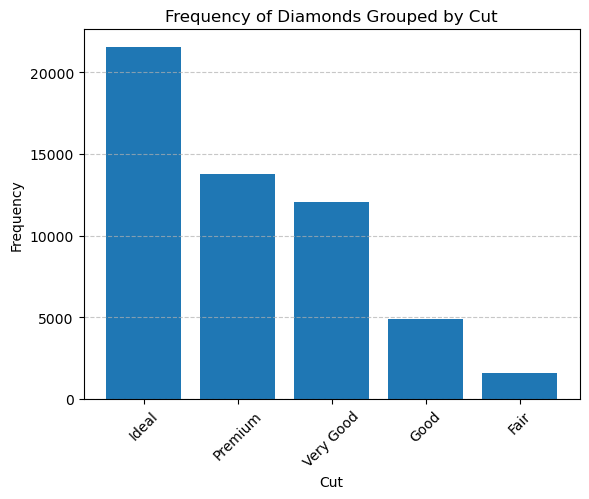

In [372]:
cut_counts = diamonds_df["cut"].value_counts() # get the amounts for each type of cut for all diamonds

plt.bar(cut_counts.index, cut_counts.values) # plot a bar chart with cut and frequency for each cut
plt.xlabel("Cut") # label x axis
plt.ylabel("Frequency") # label y axis
plt.title("Frequency of Diamonds Grouped by Cut") # label the chart
plt.xticks(rotation = 45) # rotate for readability
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) # add y axis lines for visual appearance
plt.show() # show chart

The chart above represents the frequency of diamonds grouped by cut. In the bar chart, we see it sorted from highest to lowest, meaning that an "Ideal" cut is the most frequency, and a "Fair" cut is the least frequent. The order goes from "Ideal", "Premium", "Very Good", "Good", and lastly "Fair". There are a little over 20 thousand "Ideal" cuts and less than 5 thousand "Fair" cuts. 

## Question 4: 
(5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

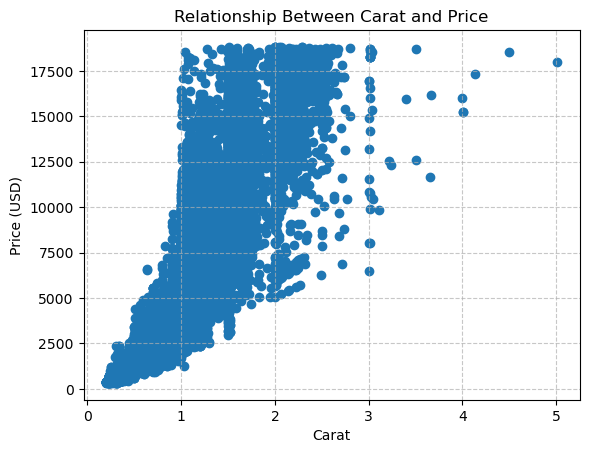

In [376]:
plt.scatter(diamonds_df["carat"], diamonds_df["price"]) # plot a scatter chart with carat weight and their respective prices
plt.xlabel("Carat") # label x axis
plt.ylabel("Price (USD)") # label y axis
plt.title("Relationship Between Carat and Price") # label whole chart
plt.grid(True, linestyle = '--', alpha = 0.7) # add x and y axis lines for visual appearance
plt.show() # show chart

The scatter plot above shows the relationship between carat and price. From the scatter plot above, we see that there is a general positive correlation, which means that as carat increases, so does price. However, it is not a linear increase, and there is an exponential increase in price as carats increase. We also see that at 3 carats, the rarity of diamonds with 3 carats is very low compared to the frequency from 0-3. 

## Question 5: 
(10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

In [380]:
corr, p_value = stats.pearsonr(diamonds_df["carat"], diamonds_df["price"]) # use pearsonr to get pearson correlation coefficient
print(f"The correlation coefficient is: {corr:.3f}") # print the result of the correlation coefficent
print("The p-value is: ", p_value) # print the p-value

The correlation coefficient is: 0.922
The p-value is:  0.0


The results indicate that the correlation coefficient is ~0.922, which is a strong positive correlation, as I mentioned before. The p-value reveals that it is unlikely that this pattern would appear if no correlation was evident. 

## Question 6: 
(15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.

Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

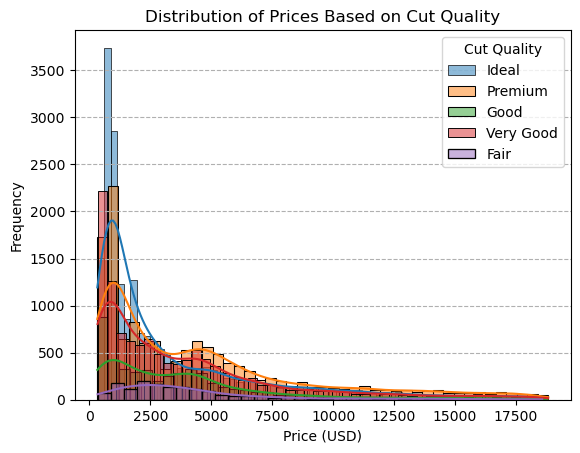

In [384]:
cuts = diamonds_df["cut"].unique() # get the unique cuts from the dataframe

# go through each cut one time
for cut in cuts:
    current_cut = diamonds_df[diamonds_df["cut"] == cut] # filter diamonds_df for the current cut
    sns.histplot(current_cut["price"], kde = True, label = cut) # plot the data in the histogram

plt.xlabel("Price (USD)") # label x axis
plt.ylabel("Frequency") # label y axis
plt.title("Distribution of Prices Based on Cut Quality") # give histogram a title
plt.legend(title = "Cut Quality") # give legend a title
plt.grid(axis = "y", linestyle = '--') # add horizontal lines for visual
plt.show() # show histogram

The histogram above represents the distribution of prices based on cut quality. Based on the histogram above, we see that most diamonds are on the left side of the chart(less expensive) and only a few diamonds are on the right side of the chart(pricier side). We also see that most ideal cuts are on the lower end of prices whereas a good such as premium has more in the mid-range. 

## Question 7: 
(10 pts) Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:

1. 'Good' vs 'Very Good'
2. 'Premium' vs 'Ideal'

**set alpha to 5% i.e. 0.05.

In [394]:
good = diamonds_df[diamonds_df['cut'] == 'Good']['price']
very_good = diamonds_df[diamonds_df['cut'] == 'Very Good']['price']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(good, very_good)

if(p_value < alpha):
    print("The prices between a good cut and a very good cut are statistically different.")
else: 
    print("The prices between a good cut and a very good cut are not statistically different.")

The prices between a good cut and a very good cut are not statistically different.


In [396]:
premium = diamonds_df[diamonds_df['cut'] == 'Premium']['price']
ideal = diamonds_df[diamonds_df['cut'] == 'Ideal']['price']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(premium, ideal)

if(p_value < alpha):
    print('The prices between a premium and an ideal cut are statistically different.')
else: 
    print("The prices between a premium cut and an ideal cut are not statistically different.")

The prices between a premium and an ideal cut are statistically different.


## Question 8: 
(7 pts) [optional/challenge question] Many statistical test rely on the assumption that data is normally distributed. Indicate which distributions in question 6 were skewed, and research one possible technique* that can be used to handle skewed data. Then perform the following:

1. Demonstrate the selected technique to correct the skewed data.
2. Repeat the analysis in question 6 using the corrected data and explain the difference in the distribution with the previous results.
3. Repeat the statistical tests in question 7 using the corrected data. Are there any changes in the statistical significance? Explain the results.

*Helpful tip: Click here to watch a video about correcting skewed data.Links to an external site.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
